Data Fields

- split: Train, Test split
- message: English text of actual messages related to disaster
- original: Text of column 3 in native language as originally written
- genre: Type of message, including direct messages, social posting, and news stories or bulletins
- related: Is the message disaster related? 1= yes, 0=no, 2=maybe
- PII: Does the message contain PII? 1= yes, 0=no
- request: Does the message contain a request? 1= yes, 0=no
- offer: Does the message contain an offer? 1= yes, 0=no
- aid_related: Is the message aid related? 1= yes, 0=no
- medical_help: Does the message concern medical help? 1= yes, 0=no
- medical_products: Does the message concern medical products? 1= yes, 0=no
- search_and_rescue: Does the message concern search and rescue? 1= yes, 0=no
- security: Does the message concern security? 1= yes, 0=no
- military: Does the message concern military? 1= yes, 0=no
- child_alone: Does the message mention a child alone? 1= yes, 0=no
- water: Does the message concern water? 1= yes, 0=no
- food: Does the message concern food? 1= yes, 0=no
- shelter: Does the message concern shelter? 1= yes, 0=no
- clothing: Does the message concern clothing? 1= yes, 0=no
- money: Does the message concern money? 1= yes, 0=no
- missing_people: Does the message indicate missing people? 1= yes, 0=no
- refugees: Does the message concern refugess? 1= yes, 0=no
- death: Does the message imply death? 1= yes, 0=no
- other_aid: Is there any other aid needed? 1=yes, 0=no
- infrastructure_related: Does the message concern infrastructure? 1= yes, 0=no
- transport: Does the message concern transport? 1= yes, 0=no
- buildings: Does the message concern buildings? 1= yes, 0=no
- electricity: Does the message concern electricity? 1= yes, 0=no
- tools: Does the message concern tools? 1= yes, 0=no
- hospitals: Does the message concern clothing? 1= yes, 0=no
- shops: Does the message concern clothing? 1= yes, 0=no
- aid_centers:Does the message concern clothing? 1= yes, 0=no
- other_infrastructure:Does the message concern clothing? 1= yes, 0=no
- weather_related: Does the message concern weather? 1= yes, 0=no
- floods: Does the message indicate there was a flood? 1= yes, 0=no
- storm: Does the message indicate there was a storm? 1= yes, 0=no
- fire: Does the message indicate there was a fire? 1= yes, 0=no
- earthquake: Does the message indicate there was an earthquake? 1= yes, 0=no
- cold: Does the message indicate there was a cold? 1= yes, 0=no
- other_weather: Does the message indicate there was other weather issues? 1= yes, 0=no
- direct_report: Does the show a direct report? 1= yes, 0=no

***I. IMPORT DATA AND PREPARATION***

In [1]:
import pandas as pd

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
import re

In [5]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
df=pd.read_csv("Medical_Severity_Dataset_2.csv")
df.head(5)

,ID,Type,Message,Medical_severity
0,18,validation,I am in Croix-des-Bouquets. We have health iss...,1
1,38,validation,"People I'm at Delma 2, we don't anything what ...",1
2,39,test,We are at Gressier we needs assistance right a...,0
3,78,validation,How can we find help and food in fontamara 43 ...,0
4,118,validation,( im taking a guess at this sorry its a mix of...,1


In [11]:
df = df.drop(['Type'], axis=1)

In [12]:
# Split the data into training, validation, and test sets with a 80:10:10 ratio
# First split the data into a 90:10 ratio for the test set
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Medical_severity'], shuffle=True)


In [13]:
df_train.head()

,ID,Message,Medical_severity
1507,20572,"People are in urgent need of tents, warm cloth...",0
1408,19522,Our pediatric ward has been operating at 150 p...,0
1704,22663,"Because the country is so crowded, others find...",0
1187,17338,Health officials in Ivory Coast say at least 1...,0
1021,14073,Area Jam gulab pahore Area ghulam haidar pahor...,1


In [14]:
df_test.head()

,ID,Message,Medical_severity
1960,25220,"The aid supplies include water, instant foods,...",0
1800,23546,The government also Wednesday announced it was...,1
98,2744,i am a victime in the area of neret. the 12 of...,0
667,27417,"In Sudan, the UN Resident and Humanitarian Coo...",0
205,4366,"I am bleeding profusely, I am under some debri...",1


In [15]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

In [16]:
pd.value_counts(df_train['Medical_severity'])

Medical_severity
0    988
1    600
Name: count, dtype: int64

In [17]:
pd.value_counts(df_test['Medical_severity'])

Medical_severity
0    247
1    150
Name: count, dtype: int64

In [18]:
def join_words(words_list):
    return ' '.join(words_list)

In [19]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also", "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this","that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from", "by", "that", "am","people","know","dont","also","would","people","please","like","would","People","Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want","Want","cause","still","since","give","year","include","problem","place","region","number","find","provide","come","can","could","may","might","area","affect","world","person","part","thank","thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report","can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others","natural","response","disaster","sandy","food","continue","something","even","already","continue",'disaster',"much","last","year","month","week","already", "important", "concern", "morning", "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance","relief","risk","management","support","stay","livelihood","temporary","support","send","someone","somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never","anymore","without","sandy","food","response","something","even","didnt","much","especially","last","week","year","month","sent","send","receive","daily","inside","concern","already","temporary","government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding','official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will","information","several","anything","find","thank","want","area","said","including","assisstance","need","team","work","live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including','among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','food','water','people','will','people','will','need','many','area','said','u','current','situation','operation',"hello",'really','trouble','bother','worry','info','please','we','case','fell','able','possibility','legally','initial','follow']
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)

In [21]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [22]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [24]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

In [25]:
df_train['message_cleaned']=df_train['Message'].apply(clean_text)
df_test['message_cleaned']=df_test['Message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [26]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
count_vectorizer = CountVectorizer()
train_bow = count_vectorizer.fit_transform(df_train['message_cleaned'])

# fit count vectorizer of train data on the "message" column of the test dataframe
test_bow = count_vectorizer.transform(df_test['message_cleaned'])

In [27]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(count_vectorizer.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# Create a dictionary of word frequencies from the BoW matrix for test
bow_dict_test = dict(zip(count_vectorizer.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))


2.2 Word Cloud

In [28]:
# Import wordcloud
from wordcloud import WordCloud

In [29]:
import matplotlib.pyplot as plt

In [30]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)

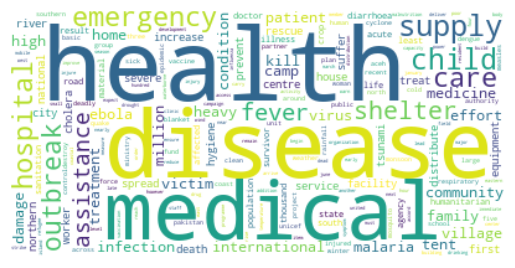

None

In [31]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

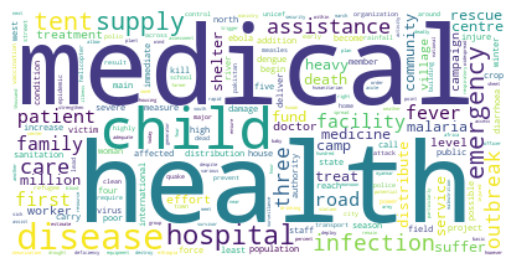

In [32]:
# Test word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe

tfidf_vectorizer = TfidfVectorizer(max_features=30)

tfidf_df_train_matrix = tfidf_vectorizer.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix = pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [34]:
# fit trained vectorized on the "message" column of the dataframe
tfidf_df_test_matrix = tfidf_vectorizer.transform(df_test['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_test_matrix = pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_test_matrix.fillna(value="", inplace=True)

In [35]:
tfidf_df_train_matrix.head()

,assistance,care,child,community,condition,damage,disease,ebola,emergency,family,...,medical,medicine,outbreak,patient,shelter,supply,tent,victim,village,virus
0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,...,0.0,0.697231,0.0,0.0,0.0,0.0,0.716846,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.468313,0.0,0.0,0.57394,0.392648,0.0,0.0,0.545071,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [36]:
tfidf_df_test_matrix.head()

,assistance,care,child,community,condition,damage,disease,ebola,emergency,family,...,medical,medicine,outbreak,patient,shelter,supply,tent,victim,village,virus
0,0.0,0.0,0.708868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.705341,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [37]:
feature__names=list(tfidf_vectorizer.get_feature_names_out())

In [38]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_train = []
for row in tfidf_df_train_matrix:
    doc_keywords_train = sorted(list(zip(tfidf_vectorizer.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_train.append([k for k, v in doc_keywords_train])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_train):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: damage, care, child
Document 2: child, community, assistance
Document 3: community, child, care
Document 4: emergency, condition, ebola
Document 5: damage, care, ebola
Document 6: child, condition, damage
Document 7: child, damage, care
Document 8: child, community, assistance
Document 9: emergency, community, disease
Document 10: damage, child, condition
Document 11: child, condition, assistance
Document 12: condition, community, assistance
Document 13: condition, community, assistance
Document 14: care, assistance, community
Document 15: care, child, assistance
Document 16: damage, child, community
Document 17: damage, ebola, care
Document 18: child, ebola, condition
Document 19: child, community, assistance
Document 20: condition, assistance, child
Document 21: assistance, disease, community
Document 22: disease, assistance, community
Document 23: care, child, condition
Document 24: child, disease, assistance
Document 25: condition, assistance, disease
Document 26: damag

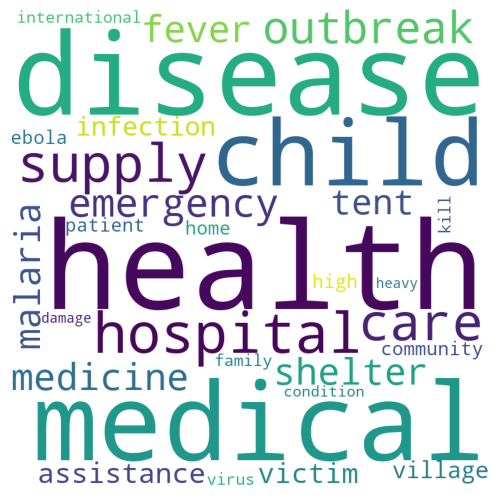

In [39]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_train_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

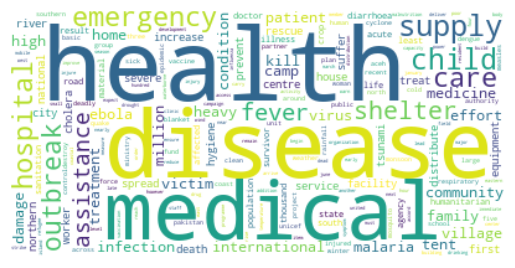

In [40]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
plt.show()

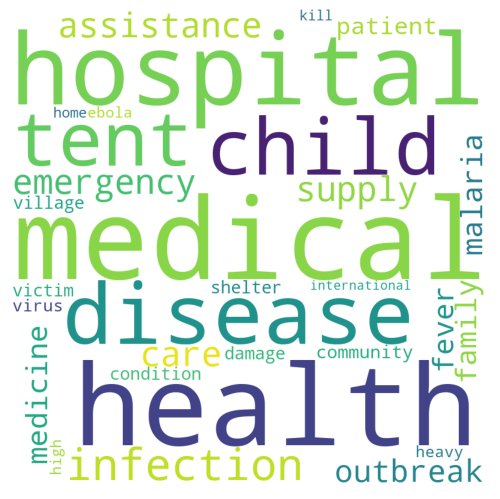

In [41]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_test_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

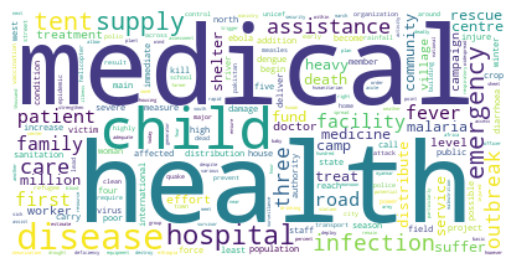

In [42]:
# Train word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
tfidf_df_train_matrix.head(3)

,assistance,care,child,community,condition,damage,disease,ebola,emergency,family,...,medical,medicine,outbreak,patient,shelter,supply,tent,victim,village,virus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.697231,0.0,0.0,0.0,0.0,0.716846,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0


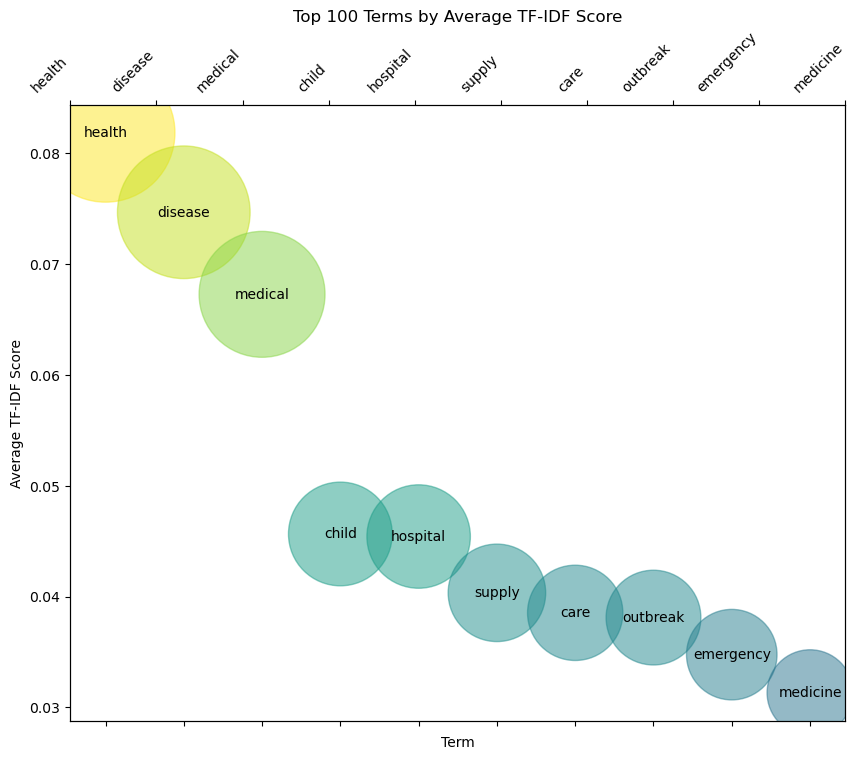

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean TF-IDF scores for each term
term_means = np.mean(tfidf_df_train_matrix, axis=0)

# Sort the terms in descending order by their mean TF-IDF scores
sorted_indices = np.argsort(term_means)[::-1][:10]
sorted_means = term_means[sorted_indices]
sorted_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_indices]

# Create a bubble chart of the top 100 terms
fig, ax = plt.subplots(figsize=(10, 8))
x = range(len(sorted_terms))
y = sorted_means
sizes = 10000 * sorted_means / np.max(sorted_means)  # calculate size proportional to term means
colors = plt.cm.viridis(sorted_means / np.max(sorted_means))  # map sizes to colors
ax.scatter(x, y, s=sizes, alpha=0.5, c=colors)

# Add text inside the bubbles
for i, term in enumerate(sorted_terms):
    ax.text(i, sorted_means[i], term, ha='center', va='center')

# Set the axis labels and title
ax.set_xlabel("Term")
ax.set_ylabel("Average TF-IDF Score")
ax.set_title("Top 100 Terms by Average TF-IDF Score")

# Set the x-tick labels
ax.set_xticks(x)
ax.set_xticklabels([''] * len(sorted_terms))  # hide the x-tick labels

# Add the word names as a separate axis below the chart
ax2 = ax.twiny()
ax2.set_xticks(x)
ax2.set_xticklabels(sorted_terms, rotation=45, ha='right')

# Show the plot
plt.show()


***III. Machine learning***

***1. Prepare data***

In [45]:
df_train

,ID,Message,Medical_severity,message_cleaned
1507,20572,"People are in urgent need of tents, warm cloth...",0,urgent tent warm clothing blanket wood burning...
1408,19522,Our pediatric ward has been operating at 150 p...,0,pediatric ward operate percent capacity open h...
1704,22663,"Because the country is so crowded, others find...",0,crowded shelter unexpected abandon building co...
1187,17338,Health officials in Ivory Coast say at least 1...,0,health ivory coast least infect dengue fever i...
1021,14073,Area Jam gulab pahore Area ghulam haidar pahor...,1,gulab pahore ghulam haidar pahores almost hous...
...,...,...,...,...
1517,20756,UNFPA is rehabilitating damaged birthing cente...,0,unfpa rehabilitate damage birthing center tent...
1537,20941,"For the next three years, teams are planning f...",0,next three plan exploratory mission reach pati...
1286,18359,"The cyclone, unusual during the wet season, hi...",0,cyclone unusual season maximum sustained winds...
399,8489,if I have someone that lost his mind during th...,1,mind


In [46]:
df_test

,ID,Message,Medical_severity,message_cleaned
1960,25220,"The aid supplies include water, instant foods,...",0,supply instant rice diaper child adult sanitar...
1800,23546,The government also Wednesday announced it was...,1,wednesday announce burqa nationwide security c...
98,2744,i am a victime in the area of neret. the 12 of...,0,victime neret january hous child badly hurt ho...
667,27417,"In Sudan, the UN Resident and Humanitarian Coo...",0,sudan resident humanitarian coordinator alzata...
205,4366,"I am bleeding profusely, I am under some debri...",1,bleed profusely debris baby diarrhea little br...
...,...,...,...,...
1576,21317,Plans are being drawn up to airlift relief goo...,0,plans draw airlift personnel near airstriplast...
829,28751,Government officials estimate another two week...,0,estimate another theyll city clean ready habit...
502,25710,The tower collapsed in such a way that there i...,0,tower collapse space underneath column
1041,14859,PSA: unless you have a hand grinder (awesome) ...,1,unless hand grinder awesome generator prudent ...


In [108]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 


X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

feature_vec = TfidfVectorizer(max_features=500) # Load the tf-idf vectorizer from sklearn
X_train = feature_vec.fit_transform(X_train).toarray()# Fit the vectorizer on the train data
X_test = feature_vec.transform(X_test).toarray() #transform the fit vector of train into unseen test data
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [109]:
# Extract the vocabulary from the vectorizer
vocab = feature_vec.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 500


In [110]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
urgent => 468
tent => 438
warm => 481
clothing => 73
blanket => 43


***2. Logistic regression***

In [111]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
import matplotlib.pyplot as plt

In [112]:
def get_score_values(scores):
    print("Precision Score: " + str(scores['test_precision'].mean()) + " +- " + str(2*scores['test_precision'].std()))
    print("Recall Score: " + str(scores['test_recall'].mean()) + " +- " + str(2*scores['test_recall'].std()))
    print("F1 Score: " + str(scores['test_f1'].mean()) + " +- " + str(2*scores['test_f1'].std()))
    print("Accuracy Score: " + str(scores['test_accuracy'].mean()) + " +- " + str(2*scores['test_f1'].std()))

In [113]:
model = LogisticRegression()
model.fit(X_train, y_train)
# convert '0' and '1' to 0 and 1
y_train = [int(label) for label in y_train]
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [106]:
scoring = ['precision', 'recall', 'f1', 'accuracy']
cross_val = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1))
cross_val

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.360805,0.012124,0.695652,0.266667,0.385542,0.679245
1,0.370989,0.012102,0.692308,0.300000,0.418605,0.685535
2,0.350974,0.010075,0.612903,0.316667,0.417582,0.666667
3,0.362891,0.010111,0.733333,0.366667,0.488889,0.710692
4,0.334703,0.010075,0.700000,0.350000,0.466667,0.698113
5,0.320567,0.012106,0.583333,0.233333,0.333333,0.647799
6,0.332556,0.010059,0.684211,0.216667,0.329114,0.666667
7,0.304577,0.010070,0.708333,0.283333,0.404762,0.685535
8,0.333364,0.010060,0.724138,0.350000,0.471910,0.702532
9,0.323277,0.010036,0.708333,0.283333,0.404762,0.683544


In [114]:
get_score_values(cross_val)

Precision Score: 0.6842544882710794 +- 0.09632761268629662
Recall Score: 0.29666666666666663 +- 0.10036968702787745
F1 Score: 0.41211659722427896 +- 0.10837703530911397
Accuracy Score: 0.6826327521694133 +- 0.10837703530911397


In [94]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
# convert '0' and '1' to 0 and 1
pred_train = [int(label) for label in pred_train]
y_train = [int(label) for label in y_train]
pred_test = [int(label) for label in pred_test]
y_test = [int(label) for label in y_test]

print("-"*53)
print("TRAINING SCORES")
print("-"*53)
print(classification_report(y_train, pred_train))
print("-"*53)
print("TEST SCORES")
print("-"*53)
print(classification_report(y_test, pred_test))
print("-"*53)





-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       988
           1       0.86      0.51      0.64       600

    accuracy                           0.78      1588
   macro avg       0.81      0.73      0.74      1588
weighted avg       0.80      0.78      0.77      1588

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       247
           1       0.62      0.39      0.48       150

    accuracy                           0.68       397
   macro avg       0.66      0.62      0.62       397
weighted avg       0.67      0.68      0.66       397

-----------------------------------------------------


In [ ]:
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_val)

# convert '0' and '1' to 0 and 1
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, pred_val, pos_label=1)
recall = recall_score(y_val, pred_val, pos_label=1)
f1 = f1_score(y_val, pred_val, pos_label=1)

print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1: "+str(f1))


In [ ]:
y_scores = lr_model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
import matplotlib.pyplot as plt

# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Obtain the coefficients of the logistic regression model
coefficients = lr_model.coef_[0]

# Sort the coefficients in descending order
sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_coefficients = sorted_coefficients[:k]
top_features = [feature for coef, feature in top_coefficients]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_coefficients])
ax.set_title("Top Coefficients in Logistic Regression Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
top_coefficients

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine the coefficients and feature names into a dictionary
word_scores = dict(zip(feature_names, coefficients))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***3. Random Forest***

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split # package training and test data spilt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # package for random classifier
from sklearn.pipeline import make_pipeline # package for pipeline

In [ ]:
model = RandomForestClassifier() # assign random classifier (black box) as a prediction model
model.fit(X_train, y_train) # fit the training and test data into the prediction model

In [ ]:
# Obtain the predictions for the validation data
rf_pred_val = model.predict(X_val)

In [ ]:

# convert '0' and '1' to 0 and 1
rf_pred_val = [int(label) for label in rf_pred_val]

In [ ]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice

results = classification_report(y_true=y_val, y_pred=rf_pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, rf_pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


print(classification_report(y_val, rf_pred_val))


In [ ]:
y_scores = model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [ ]:
# convert '0' and '1' to 0 and 1
y_val = [int(label) for label in y_val]


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
top_importances

In [ ]:
words = [pair[1] for pair in top_importances]

In [ ]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the feature importance values you provided, we can see that "disease" and "medicine" are the two most important features for determining if the text relates to medical. Therefore, we can increase the weights of the terms "cancer" and "heart disease" to reflect their importance

***4. Decision Tree***

In [ ]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [ ]:
# Load the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = dt_model.predict(X_val)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
y_pred = [int(label) for label in pred_val]
results = classification_report(y_true=y_val, y_pred=y_pred, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
pred_val=np.array([int(x) for x in pred_val])

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = dt_model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Decision tree Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
# Generate feature importance plot
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***5. SVM***

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Load the model
svc_model = SVC(C=0.5, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(y_val, rf_pred_val))

In [ ]:
# Load the model
svc_model = SVC(C=1, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
print(classification_report(y_val, rf_pred_val))

In [ ]:
# Load the model
svc_model = SVC(C=1.5, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
print(classification_report(y_val, rf_pred_val))

In [ ]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importances
result = permutation_importance(svc_model, X_test, y_test, n_repeats=2, random_state=0)
importances = result.importances_mean

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Extract the top k feature importance and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in SVM Model")
ax.set_xlabel("Importance Score")
plt.show()

***6. Model Comparision***

*After training the models using the training set and validating them during training using validation set, now we compare the models using the testing set.*

In [ ]:
print("Model \t Accuracy \t Weighted Avg F1-score")
print("-----------------------------------------------")

# Logistic Regression
pred_test = lr_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"LR \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Decision Tree
pred_test = dt_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"DT \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Support Vector Machine
pred_test = svc_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"SVM \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Random Forest:

pred_test = model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"Random Forest \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")


In [115]:
# # https://www.kaggle.com/code/neerajmohan/nlp-text-classification-using-tf-idf-features 
#LINK FOR PERFORMING CORRECT WAY OF PREDICTION USING NLP FEATURES
